<a href="https://colab.research.google.com/github/ruslanmv/Agent-driven-Ontology-Repair-and-Evolution/blob/master/ADORE_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADORE v1.0

**A Design Pattern for Reflective, Agent-Guided Ontology Evolution from LLM-Induced Epistemic Anomalies**

In an era where knowledge is constantly evolving, **ontologies** — structured representations of knowledge — play a critical role in AI systems. However, manually updating and maintaining these complex knowledge bases can be a daunting task. This notebook introduces the **Axiom Discovery, Refinement, and Ontology Evolution (ADORE)** program, a cutting-edge, multi-agent framework designed to intelligently automate and streamline this process. Imagine having a dynamic team of AI experts and human overseers working in concert to continuously expand and refine a vast digital encyclopedia. ADORE leverages powerful tools like **Owlready2** for robust ontology management and **LangGraph** for orchestrating the collaborative workflow of its specialized agents. At its core, the system empowers the AI to propose new knowledge while ensuring logical consistency and incorporating essential human oversight, paving the way for more adaptive and accurate knowledge-driven applications.

---

## Program Workflow: Axiom Discovery and Ontology Evolution (ADORE)

The ADORE program operates as a sophisticated, multi-step process designed to intelligently propose, evaluate, and integrate new knowledge (axioms) into an existing **ontology** (a structured representation of knowledge). Imagine it as a team of experts collaborating to refine a medical encyclopedia.

Here's a simplified flow:

1.  **Environment Setup and Ontology Initialization:** First, the program gets ready by importing all the necessary tools (like **Owlready2** for handling the ontology and **LangGraph** for managing the workflow). It then loads or creates a starting ontology, which in this case, is a basic **Pneumonia ontology** containing initial facts about the disease. This also includes setting up a mock system to use OpenAI's powerful language models, acting as a stand-in for other AI services.

2.  **Axiom Proposal (LLM Generator):** An **AI (Large Language Model) agent** steps in, acting as a creative thinker. It analyzes the current ontology and proposes a *new axiom* – a single, formal statement of knowledge – in a specific logical format. For example, it might suggest that "Pneumonia can be caused by NovelVirusX."

3.  **Axiom Assessment (Domain Expert & Linguistic Insight Agents):** The proposed axiom then goes through a review process by two specialized agents:
    * The **Domain Expert Agent** evaluates the axiom's **medical plausibility** (e.g., "Does it make sense from a medical perspective?").
    * The **Linguistic Insight Agent** checks its **syntactic correctness** and logical structure (e.g., "Is it written in the correct logical language?").

4.  **Consistency Check (Consistency Guard Agent):** Next, a crucial step: the **Consistency Guard Agent** takes the proposed axiom and temporarily adds it to a *copy* of the current ontology. It then runs a **reasoner** (a tool that checks for logical contradictions). If the new axiom creates a contradiction with existing knowledge in the ontology, it's flagged as inconsistent.

5.  **Human Decision Stage 1 (HITL Stage 1):** A **Human-in-the-Loop (HITL)** agent steps in to make a strategic decision. If the proposed axiom is consistent, the human (simulated here) might choose to "Accept Axiom" (though the actual addition happens later). If it's *inconsistent*, the human decides on "Ontology Evolution," indicating that a repair process is needed.

6.  **Axiom Weakening/Repair (Axiom Weakening Agent):** If an inconsistency was detected, the **Axiom Weakening Agent** attempts to fix it. This involves modifying or "weakening" existing axioms in the ontology or even the proposed axiom itself to resolve the contradiction while trying to retain as much useful information as possible. It proposes a "repaired" version of the ontology.

7.  **Human Decision Stage 2 (HITL Stage 2):** Another **Human-in-the-Loop** stage occurs. If a repair proposal was made, the human (simulated) reviews it and decides whether to accept the repaired ontology as the new, updated knowledge base.

8.  **Knowledge Consolidation & Logging (Meta-Knowledge Agent):** Finally, the **Meta-Knowledge Agent** takes the chosen, consistent version of the ontology (either the one with the accepted axiom or the repaired one) and makes it the *new active ontology*. It also meticulously records all the steps and decisions made during this cycle, creating a detailed log of the knowledge evolution process.

This entire cycle is designed to allow the system to continuously learn and expand its knowledge base in a logically sound and human-supervised manner.



In [1]:
# Cell 1: Install required packages
!pip install owlready2 langgraph python-dotenv langchain-ibm==0.3.10 langchain==0.3.10
!pip install langchain_openai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 78.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
import base64
import requests
from IPython.display import Image, display

def render_mermaid(mermaid_code):
    # Encode the Mermaid code in base64
    encoded_code = base64.urlsafe_b64encode(mermaid_code.encode('utf-8')).decode('ascii')
    # Construct the URL to fetch the image
    url = f"https://mermaid.ink/img/{encoded_code}"
    # Retrieve and display the image
    response = requests.get(url)
    if response.status_code == 200:
        display(Image(response.content))
    else:
        print("Error fetching the Mermaid diagram.")

# Define your Mermaid diagram
mermaid_code = """
graph TD
    LLMGen --> DEA
    DEA --> LIA
    LIA --> CGA
    CGA --> HITL1
    HITL1 -- Ontology Evolution --> AWEA
    HITL1 -- Accept Axiom --> MKA
    AWEA --> HITL2
    HITL2 --> MKA
    MKA --> END
"""


### ADORE Workflow Diagram

The following Mermaid diagram provides a visual representation of the ADORE system's flow, illustrating how each agent interacts in this iterative process of knowledge management.

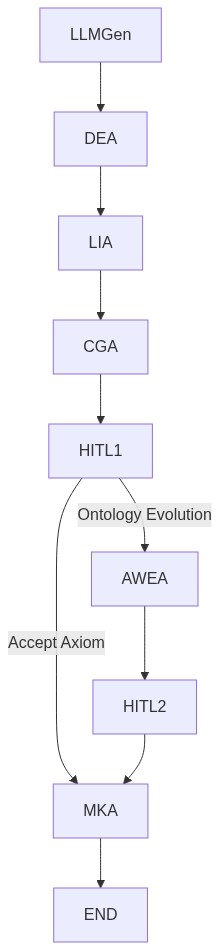

In [12]:
# Render the diagram
render_mermaid(mermaid_code)




This graph showcases the dynamic interplay between the various components:

* **LLMGen (LLM Generator Agent)**: The **starting point** of the workflow, where the AI proposes new axioms to expand the ontology's knowledge.
* **DEA (Domain Expert Agent)**: Evaluates the **real-world plausibility** of the proposed axiom, mimicking a subject-matter expert's judgment.
* **LIA (Linguistic Insight Agent)**: Assesses the **formal correctness and syntactic coherence** of the axiom in Description Logic.
* **CGA (Consistency Guard Agent)**: A **critical checkpoint** that verifies the axiom's compatibility with the existing ontology, flagging any logical inconsistencies.
* **HITL1 (Human-in-the-Loop Stage 1)**: The **initial human decision point**, determining whether to proceed with ontology evolution (repair) if inconsistencies are found or to accept the axiom if it's consistent.
* **AWEA (Axiom Weakening Agent)**: Engages when inconsistencies are detected, **proposing modifications** to resolve contradictions and restore logical soundness.
* **HITL2 (Human-in-the-Loop Stage 2)**: The **secondary human review**, where proposed repairs from AWEA are evaluated and chosen for integration.
* **MKA (Meta-Knowledge Agent)**: The **final consolidation stage**, responsible for updating the active ontology with accepted changes and logging the entire cycle for future reference.
* **END**: Signifies the **completion of one ADORE cycle**, leaving the ontology updated and ready for continuous refinement.

This structured workflow ensures that any new knowledge introduced into the ontology is rigorously vetted for domain relevance, linguistic correctness, and logical consistency, with strategic human checkpoints to guide the automated processes.

This notebook introduces a comprehensive framework for Axiom Discovery, Refinement, and Ontology Evolution (ADORE), designed to intelligently manage and update knowledge within an OWL ontology. At its core, the system orchestrates various specialized agents using LangGraph, a library for building stateful, multi-actor applications, and leverages Owlready2 for robust ontology manipulation and reasoning. The setup begins by importing necessary libraries and configuring the environment to support both local execution and Google Colab, including secure handling of API keys for large language models. Notably, a MockWatsonxLLM class is implemented to seamlessly integrate OpenAI's ChatOpenAI as a substitute, ensuring the workflow remains functional even without direct access to IBM Watsonx. The initial state of the system is anchored by a foundational "Pneumonia" OWL ontology, which is then dynamically updated through a series of interconnected agents: an LLM Generator proposing new axioms, Domain Expert and Linguistic Insight Agents assessing their quality, a Consistency Guard Agent validating their logical coherence, and a Human-in-the-Loop stage for strategic decision-making. Should inconsistencies arise, an Axiom Weakening Agent proposes repairs, leading to a second Human-in-the-Loop review. Finally, a Meta-Knowledge Agent consolidates the process by logging the cycle's outcomes and updating the ontology for subsequent iterations, demonstrating a sophisticated approach to automated and human-guided ontology evolution.

In [16]:
# Cell 1: Imports and Environment Setup

import os
import copy
import json
import tempfile  # Needed for ontology duplication
from dotenv import load_dotenv

import owlready2

# Owlready2 for ontology manipulation & reasoning
from owlready2 import get_ontology, Thing, ObjectProperty, DataProperty, sync_reasoner, World # Added DataProperty

# Attempt to import restriction and construct classes from their typical module
try:
    from owlready2.class_construct import (
        Restriction, SomeValuesFrom, AllValuesFrom,
        MinCardinality, MaxCardinality, ExactCardinality,
        HasValue # Add others if used by your logic
    )
    CLASS_CONSTRUCT_IMPORTED = True
    print("Successfully imported Restriction classes from owlready2.class_construct.")
except ImportError:
    CLASS_CONSTRUCT_IMPORTED = False
    print("Warning: Could not import class_construct from Owlready2. "
          "Axiom processing involving SomeValuesFrom, AllValuesFrom, etc., might fail.")
    # Define fallbacks so the script doesn't immediately crash if these names are used later
    # and the import failed. This allows the error to occur where they are used.
    SomeValuesFrom, AllValuesFrom = None, None
    MinCardinality, MaxCardinality, ExactCardinality = None, None, None
    Restriction = None # Define Restriction as well if it's used as a base type check

# LangGraph for orchestration
from langgraph.graph import StateGraph, END

# LangChain schema for messages
from langchain.schema import HumanMessage, AIMessage

# Conditional imports for Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import userdata

# New import for OpenAI
from langchain_openai import ChatOpenAI

# Load .env (if running outside Colab)
if not IN_COLAB:  # Only load dotenv if not in Colab
    load_dotenv()

# Fetch IBM Watsonx credentials (will be ignored by mock but kept for signature)
if IN_COLAB:
    API_KEY_WATSONX = userdata.get("WATSONX_API_KEY")
    PROJECT_ID_WATSONX = userdata.get("PROJECT_ID")
    URL_WATSONX = userdata.get("WATSONX_URL")
else:
    API_KEY_WATSONX = os.getenv("WATSONX_API_KEY")
    PROJECT_ID_WATSONX = os.getenv("PROJECT_ID")
    URL_WATSONX = os.getenv("WATSONX_URL")

# Fallback check, though these specific keys won't be used by the OpenAI mock
if not API_KEY_WATSONX or not PROJECT_ID_WATSONX or not URL_WATSONX:
    print("Warning: WATSONX_API_KEY, PROJECT_ID, or WATSONX_URL not set. Mock will proceed with OpenAI.")
    # Not raising RuntimeError to allow OpenAI mock to function without these.

# Fetch OpenAI personal API key
if IN_COLAB:
    OPENAI_API_KEY = userdata.get("OPENAI_API_KEY_PERSONAL")
else:
    OPENAI_API_KEY = os.getenv("OPENAI_API_KEY_PERSONAL")

if not OPENAI_API_KEY:
    raise RuntimeError("Please set OPENAI_API_KEY_PERSONAL in environment or Colab userdata.")

# Define the OpenAI model ID to be used
OPENAI_MODEL_ID = "gpt-3.5-turbo"


# Cell 2: Mocking WatsonxLLM with OpenAI Under the Hood

class MockWatsonxLLM:
    def __init__(self, model_id, url, apikey, project_id, params):
        self.model_id = model_id  # Watsonx model_id (unused by OpenAI)
        self.url = url            # Watsonx URL (unused by OpenAI)
        self.apikey = apikey      # Watsonx API key (unused by OpenAI)
        self.project_id = project_id  # Watsonx Project ID (unused by OpenAI)
        self.params = params

        self.openai_llm = ChatOpenAI(
            model=OPENAI_MODEL_ID,
            openai_api_key=OPENAI_API_KEY,  # Actual OpenAI key
            temperature=self.params.get("temperature", 0.7),
            max_tokens=self.params.get("max_new_tokens", 200)
        )
        print("Initialized MockWatsonxLLM (secretly using OpenAI)")

    def invoke(self, messages):
        print(f"MockWatsonxLLM received messages (forwarding to OpenAI): {messages}")
        try:
            openai_response_obj = self.openai_llm.invoke(messages)
            return openai_response_obj
        except Exception as e:
            print(f"An error occurred during OpenAI LLM invocation within mock: {e}")
            return AIMessage(content="This is a fallback mock response due to an OpenAI error.")

watsonx_llm = MockWatsonxLLM(
    model_id="some_watsonx_model_id",          # Placeholder
    url=URL_WATSONX or "http://fake.watsonx.url",  # Placeholder or loaded
    apikey=API_KEY_WATSONX or "fake_watsonx_apikey",  # Placeholder or loaded
    project_id=PROJECT_ID_WATSONX or "fake_watsonx_project_id",  # Placeholder or loaded
    params={
        "decoding_method": "greedy",
        "max_new_tokens": 200,
        "temperature": 0.7
    }
)
print("Using watsonx_llm instance:", isinstance(watsonx_llm, MockWatsonxLLM))


# Cell 3: Build the Initial Pneumonia Ontology in Owlready2

ONTOLOGY_IRI = "http://example.org/pneumonia_ontology.owl"
onto = get_ontology(ONTOLOGY_IRI)  # Operates in default_world
temp_onto_file_path = None # Define to ensure it's available in global scope for Cell 6

with onto:
    class Pneumonia(Thing):
        pass
    class Bacterium(Thing):
        pass
    class NovelVirusX(Thing):
        pass
    class Pathogen(Thing):
        pass

    class causedBy(ObjectProperty):
        domain = [Pneumonia]
        range = [Thing]

    # Ensure SomeValuesFrom and MaxCardinality are available for ontology construction
    # Owlready2's .some() and .max() are Pythonic ways to create restrictions.
    # They should internally use the correct classes if Owlready2 is functioning properly.
    # The CLASS_CONSTRUCT_IMPORTED check is more for isinstance checks later.
    try:
        Pneumonia.is_a.append(causedBy.some(Bacterium))
        Bacterium.disjoint_with = [NovelVirusX]
        Pneumonia.is_a.append(causedBy.max(1, Thing))
    except Exception as e_construct:
        print(f"Error during initial axiom construction (e.g. .some, .max): {e_construct}")
        print("This might happen if Owlready2's internal restriction classes are not found due to import issues.")


# Save and run reasoner
try:
    # Create a temporary file for saving to avoid issues with existing files if any
    temp_onto_file = tempfile.NamedTemporaryFile(delete=False, suffix=".owl")
    temp_onto_file_path = temp_onto_file.name # Assign to the globally defined variable
    temp_onto_file.close()
    onto.save(file=temp_onto_file_path, format="rdfxml")
    print(f"Initial ontology saved to temporary file: {temp_onto_file_path}")

    with onto: # Use the main ontology's world
        sync_reasoner()
    print("Initial ontology created, saved, and checked for consistency.")
    # Clean up the temporary file after use, it's not needed anymore for 'onto'
    # The path is stored in initial_state if needed for later reference/cleanup.
    # However, _duplicate_ontology will use this file if it's the most recent save.
    # For this script's flow, it might be better to keep it until the state is copied or the script ends.
    # For now, let's not delete it here, MKA and final cleanup can handle it.

except Exception as e:
    print(f"Error during initial ontology setup: {e}")
    import traceback
    traceback.print_exc()
    # Depending on severity, you might want to raise e or handle it


# Cell 4: Helper Function to Duplicate Ontology and Inspect

def _duplicate_ontology(source_ontology):
    """
    Creates an isolated duplicate of an Owlready2 ontology.
    Returns the new ontology instance and the path to its temporary file.
    """
    if source_ontology is None:
        raise ValueError("Cannot duplicate a None ontology.")

    # Create a new world for the duplicate to ensure isolation
    isolated_world = World()

    # Save the source ontology to a temporary file
    # Each duplication gets its own fresh temp file.
    temp_file_handler_dup = tempfile.NamedTemporaryFile(delete=False, suffix=".owl")
    temp_file_path_dup = temp_file_handler_dup.name
    temp_file_handler_dup.close()

    source_ontology.save(file=temp_file_path_dup, format="rdfxml")

    file_iri = f"file://{temp_file_path_dup}"
    # Load the ontology into the new, isolated world
    copied_onto = isolated_world.get_ontology(file_iri).load()

    print(f"Duplicated ontology {source_ontology.name} into new world with IRI {copied_onto.base_iri} (temp file: {temp_file_path_dup})")
    return copied_onto, temp_file_path_dup  # Return path for potential cleanup


def is_consistent(ontology_to_check):
    """
    Returns True if the ontology is consistent. Uses a duplicated ontology for the check.
    """
    if ontology_to_check is None:
        print("is_consistent: Received None ontology, returning False.")
        return False

    temp_onto_for_consistency = None
    temp_file_path_for_consistency = None
    try:
        temp_onto_for_consistency, temp_file_path_for_consistency = _duplicate_ontology(ontology_to_check)
        with temp_onto_for_consistency:
            sync_reasoner(infer_property_values=False)
        # If reasoner runs without error, assume consistent for this check's purpose
        # A more robust check would be `not list(temp_onto_for_consistency.inconsistent_classes())`
        # but that requires HermiT to populate it, which it does.
        return not list(temp_onto_for_consistency.world.inconsistent_classes())

    except Exception as e:
        print(f"is_consistent: Consistency check failed or error during duplication/reasoning: {e}")
        return False
    finally:
        if temp_onto_for_consistency and hasattr(temp_onto_for_consistency, '_world'):
             if hasattr(temp_onto_for_consistency._world, 'closed') and not temp_onto_for_consistency._world.closed:
                if temp_onto_for_consistency._world is not owlready2.default_world: # Don't close default_world
                    temp_onto_for_consistency._world.close()
                    print(f"is_consistent: Closed isolated world for {temp_onto_for_consistency.name}")
        if temp_file_path_for_consistency and os.path.exists(temp_file_path_for_consistency):
            try:
                os.unlink(temp_file_path_for_consistency)
            except Exception as e_unlink:
                print(f"is_consistent: Error unlinking temp file {temp_file_path_for_consistency}: {e_unlink}")


def print_axioms(ontology_to_print):
    """
    Print all logical axioms (TBox) in a readable form.
    """
    if ontology_to_print is None:
        print("\n=== print_axioms: Ontology is None. Cannot print axioms. ===")
        return

    print(f"\n=== Current Ontology Axioms ({ontology_to_print.name}) ===")
    try:
        for cls in ontology_to_print.classes():
            for sup in cls.is_a:
                print(f"{cls.name} ⊑ {sup}")
        for dis_axiom_obj in ontology_to_print.disjoint_classes():
            if hasattr(dis_axiom_obj, 'entities'):
                entity_names = [e.name for e in dis_axiom_obj.entities if hasattr(e, 'name')]
                if entity_names:
                    print(f"DisjointClasses({', '.join(entity_names)})")
    except Exception as e:
        print(f"Error printing axioms: {e}")
    print("=== End of Axioms ===\n")


# Cell 5: Define Agents as Python Functions

# 5.1. LLM Generator Agent
def llm_generator(state):
    print("--- Running LLM Generator Agent ---")
    prompt = (
        "Given the ontology axioms:\n"
        "1) Pneumonia ⊑ ∃causedBy.Bacterium\n"
        "2) NovelVirusX ⊑ ¬Bacterium\n"
        "3) Pneumonia ⊑ ≤1 causedBy.⊤\n"
        "\n"
        "Please propose a single new DL axiom suggesting that Pneumonia "
        "can be caused by NovelVirusX, written in Description Logic syntax. "
        "Output exactly one line like:\n"
        "Pneumonia ⊑ ∃causedBy.NovelVirusX\n"
    )
    print("Send Prompt to AI:",prompt)
    response_obj = watsonx_llm.invoke([HumanMessage(content=prompt)])
    if response_obj and hasattr(response_obj, 'content') and response_obj.content:
        response_string = response_obj.content
        axiom_str = response_string.strip().splitlines()[0]
        print("AI proposed axiom:",axiom_str)
        log_action = "proposed_axiom"
    else:
        axiom_str = "Pneumonia ⊑ ∃causedBy.NovelVirusX"
        log_action = "proposed_axiom_fallback_llm_error"
        print(f"LLMGen: Warning - LLM response was empty or invalid. Using fallback axiom: {axiom_str}")

    state["candidate_axiom"] = axiom_str
    state["log"].append({"agent": "LLMGen", "action": log_action, "axiom": axiom_str})
    return state


# 5.2. Domain Expert Agent (DEA)
def domain_expert_agent(state):
    print("--- Running Domain Expert Agent ---")
    ax = state.get("candidate_axiom")
    score = 0.9 if isinstance(ax, str) and "NovelVirusX" in ax else 0.1
    justification = ("Contains NovelVirusX, which is medically plausible." if score > 0.5
                     else "Unclear entity or does not seem plausible.")
    state["dea_assessment"] = {"score": score, "justification": justification}
    state["log"].append({"agent": "DEA", "assessment": state["dea_assessment"]})
    return state


# 5.3. Linguistic Insight Agent (LIA)
def linguistic_insight_agent(state):
    print("--- Running Linguistic Insight Agent ---")
    ax = state.get("candidate_axiom")
    if isinstance(ax, str) and "⊑ ∃" in ax and "." in ax:
        score, justification = 0.8, "Syntactically coherent DL axiom."
    else:
        score, justification = 0.2, "Does not match expected DL pattern or not a string."
    state["lia_assessment"] = {"score": score, "justification": justification}
    state["log"].append({"agent": "LIA", "assessment": state["lia_assessment"]})
    return state


# 5.4. Consistency Guard Agent (CGA)
def consistency_guard_agent(state):
    print("--- Running Consistency Guard Agent ---")
    orig_onto = state.get("ontology")
    candidate_ax_str = state.get("candidate_axiom")
    temp_file_path_cga = None
    temp_onto_cga = None

    if orig_onto is None:
        state["consistent_with_candidate"] = False
        state["mis_list"] = ["<main_ontology_not_found_in_state_for_CGA>"]
        state["log"].append({"agent": "CGA", "status": "ontology_error", "error": "Main ontology (orig_onto) is None."})
        return state

    if not isinstance(candidate_ax_str, str):
        state["consistent_with_candidate"] = False
        state["mis_list"] = [f"<invalid_candidate_axiom_format_not_string: {type(candidate_ax_str)}>"]
        state["log"].append({"agent": "CGA", "status": "parsing_error", "error": f"Candidate axiom not a string: {type(candidate_ax_str)}"})
        return state

    try:
        temp_onto_cga, temp_file_path_cga = _duplicate_ontology(orig_onto)
        print(f"CGA: Successfully duplicated ontology. Original: {orig_onto.name}, Temp copy: {temp_onto_cga.name}")

        lhs_str, rhs_str = [s.strip() for s in candidate_ax_str.split("⊑")]

        if rhs_str.startswith("∃") and "." in rhs_str:
            prop_filler_part = rhs_str[1:]
            prop_name, filler_name = prop_filler_part.split(".", 1)

            lhs_class_temp = getattr(temp_onto_cga, lhs_str, None)
            prop_temp = getattr(temp_onto_cga, prop_name, None)
            filler_class_temp = getattr(temp_onto_cga, filler_name, None)

            missing_entities = []
            if not lhs_class_temp: missing_entities.append(f"LHS class '{lhs_str}'")
            if not prop_temp: missing_entities.append(f"Property '{prop_name}'")
            if not filler_class_temp: missing_entities.append(f"Filler class '{filler_name}'")

            if missing_entities:
                error_msg = f"CGA: Could not find all required entities in temp_onto_cga ({temp_onto_cga.name}): {', '.join(missing_entities)}."
                raise ValueError(error_msg)

            if not issubclass(prop_temp, ObjectProperty): # CORRECTED CHECK
                error_msg = (f"CGA: Entity '{prop_name}' in temp_onto_cga (value: {prop_temp}, type: {type(prop_temp)}) "
                             f"is not an ObjectProperty. Expected a subclass of owlready2.ObjectProperty.")
                raise ValueError(error_msg)

            # Ensure SomeValuesFrom is available for creating the axiom if needed by Owlready2 internals
            # The .some() method should handle this, but good to be aware if CLASS_CONSTRUCT_IMPORTED is False
            if not (CLASS_CONSTRUCT_IMPORTED and SomeValuesFrom):
                 print("CGA: Warning - SomeValuesFrom class not imported, relying on property.some() internal behavior.")


            new_axiom = prop_temp.some(filler_class_temp)
            lhs_class_temp.is_a.append(new_axiom)
            print(f"CGA: Added to temp_onto_cga '{temp_onto_cga.name}': {lhs_class_temp.name} ⊑ {prop_temp.name} some {filler_class_temp.name}")
        else:
            raise ValueError(f"CGA: Unsupported axiom structure for parsing: {candidate_ax_str}")

        with temp_onto_cga:
            sync_reasoner(infer_property_values=False)

        state["consistent_with_candidate"] = True
        state["mis_list"] = []
        state["log"].append({"agent": "CGA", "status": "consistent", "axiom_added_to_temp": candidate_ax_str})
        print(f"CGA: Candidate axiom '{candidate_ax_str}' is consistent with the (temporarily modified) ontology.")

    except ValueError as ve:
        print(f"CGA: Axiom parsing/application error: {ve}")
        state["consistent_with_candidate"] = False
        state["mis_list"] = [f"<parsing_value_error_cga: {str(ve)}>", candidate_ax_str]
        state["log"].append({"agent": "CGA", "status": "parsing_error", "error": str(ve)})
    except Exception as e:
        import traceback
        print(f"CGA: Inconsistency detected or other error during reasoning/check: {e}")
        print(traceback.format_exc())
        state["consistent_with_candidate"] = False
        state["mis_list"] = [
            "Pneumonia ⊑ ∃causedBy.Bacterium", "NovelVirusX ⊑ ¬Bacterium",
            "Pneumonia ⊑ ≤1 causedBy.⊤", candidate_ax_str
        ]
        state["log"].append({
            "agent": "CGA", "status": "inconsistent_or_error_cga",
            "mis_simulation": state["mis_list"], "error_details": str(e)
        })
    finally:
        if temp_onto_cga and hasattr(temp_onto_cga, '_world') and temp_onto_cga._world is not orig_onto._world:
             if hasattr(temp_onto_cga._world, 'closed') and not temp_onto_cga._world.closed:
                if temp_onto_cga._world is not owlready2.default_world:
                    temp_onto_cga._world.close()
                    print(f"CGA: Closed isolated world for {temp_onto_cga.name}")
        if temp_file_path_cga and os.path.exists(temp_file_path_cga):
            try:
                os.unlink(temp_file_path_cga)
            except Exception as unlink_e:
                print(f"CGA: Error unlinking temp file {temp_file_path_cga}: {unlink_e}")
    return state


# 5.5. Human-in-the-Loop (Stage 1)
def hitl_stage1(state):
    print("--- Running HITL Stage 1 ---")
    if not state.get("consistent_with_candidate", True):
        state["chosen_strategy"] = "Ontology Evolution"
        rationale = "Inconsistency detected, choosing ontology evolution to repair."
    else:
        state["chosen_strategy"] = "Accept Axiom"
        rationale = ("Candidate axiom is consistent. "
                     "Simulating choice to accept (no direct addition in this step).")
    state["log"].append({
        "agent": "HITL1",
        "strategy": state["chosen_strategy"],
        "rationale": rationale
    })
    return state


# 5.6. Axiom Weakening Agent (AWEA)
def axiom_weakening_agent(state):
    print("--- Running Axiom Weakening Agent ---")
    if state.get("chosen_strategy") != "Ontology Evolution" or state.get("consistent_with_candidate", True):
        state["repair_proposals"] = []
        state["log"].append({"agent": "AWEA", "status": "skipped_or_no_repair_needed", "reason": state.get("chosen_strategy")})
        return state

    orig_onto = state.get("ontology")
    candidate_ax_str = state.get("candidate_axiom")
    temp_file_path_awea = None
    repaired_onto = None

    if orig_onto is None:
        state["repair_proposals"] = []
        state["log"].append({"agent": "AWEA", "status": "ontology_error", "error": "Main ontology (orig_onto) is None."})
        return state

    try:
        repaired_onto, temp_file_path_awea = _duplicate_ontology(orig_onto)
        print(f"AWEA: Successfully duplicated ontology for repair. Original: {orig_onto.name}, Repaired copy: {repaired_onto.name}")

        Pneumonia_cls_rep = getattr(repaired_onto, "Pneumonia", None)
        Bacterium_cls_rep = getattr(repaired_onto, "Bacterium", None)
        NovelVirusX_cls_rep = getattr(repaired_onto, "NovelVirusX", None)
        Pathogen_cls_rep = getattr(repaired_onto, "Pathogen", None)
        causedBy_prop_rep = getattr(repaired_onto, "causedBy", None)

        required_entities = {"Pneumonia": Pneumonia_cls_rep, "Bacterium": Bacterium_cls_rep,
                             "NovelVirusX": NovelVirusX_cls_rep, "Pathogen": Pathogen_cls_rep,
                             "causedBy": causedBy_prop_rep}
        missing = [name for name, entity in required_entities.items() if entity is None]
        if missing:
            raise ValueError(f"AWEA: Could not find required entities in repaired_onto ({repaired_onto.name}): {', '.join(missing)}")

        if not issubclass(causedBy_prop_rep, ObjectProperty): # CORRECTED CHECK
            raise ValueError(
                f"AWEA: 'causedBy' in repaired_onto ({causedBy_prop_rep}, type: {type(causedBy_prop_rep)}) "
                f"is not an ObjectProperty. Expected a subclass of owlready2.ObjectProperty."
            )

        ax1_to_remove = None
        removed_ax1_flag = False
        if CLASS_CONSTRUCT_IMPORTED and SomeValuesFrom: # GUARDED
            for axiom in list(Pneumonia_cls_rep.is_a):
                if (isinstance(axiom, SomeValuesFrom) and hasattr(axiom, 'property') and # GUARDED USE
                        axiom.property == causedBy_prop_rep and hasattr(axiom, 'filler') and
                        axiom.filler == Bacterium_cls_rep):
                    ax1_to_remove = axiom
                    break
            if ax1_to_remove:
                Pneumonia_cls_rep.is_a.remove(ax1_to_remove)
                removed_ax1_flag = True
                print(f"AWEA: Removed 'Pneumonia ⊑ ∃causedBy.Bacterium' from {repaired_onto.name}.")
            else:
                print(f"AWEA: Ax1 'Pneumonia ⊑ ∃causedBy.Bacterium' not found in {Pneumonia_cls_rep.name}.is_a list for removal.")
        else:
            print("AWEA: Warning - SomeValuesFrom class not imported. Cannot reliably check/remove specific existential restriction axiom.")

        Pneumonia_cls_rep.is_a.append(causedBy_prop_rep.some(Pathogen_cls_rep))
        print(f"AWEA: Added 'Pneumonia ⊑ ∃causedBy.Pathogen' to {repaired_onto.name}.")

        Bacterium_cls_rep.is_a.append(Pathogen_cls_rep)
        NovelVirusX_cls_rep.is_a.append(Pathogen_cls_rep)
        print(f"AWEA: Added bridging axioms for Bacterium and NovelVirusX to Pathogen in {repaired_onto.name}.")

        if isinstance(candidate_ax_str, str) and "⊑ ∃" in candidate_ax_str:
            try:
                lhs_cand_str, rhs_cand_str = [s.strip() for s in candidate_ax_str.split("⊑")]
                if rhs_cand_str.startswith("∃") and "." in rhs_cand_str:
                    prop_cand_filler_part = rhs_cand_str[1:]
                    prop_cand_name, filler_cand_name = prop_cand_filler_part.split(".", 1)

                    lhs_cand_cls_rep = getattr(repaired_onto, lhs_cand_str, None)
                    prop_cand_rep = getattr(repaired_onto, prop_cand_name, None)
                    filler_cand_cls_rep = getattr(repaired_onto, filler_cand_name, None)

                    if (all([lhs_cand_cls_rep, prop_cand_rep, filler_cand_cls_rep]) and
                            issubclass(prop_cand_rep, ObjectProperty)): # CORRECTED CHECK
                        lhs_cand_cls_rep.is_a.append(prop_cand_rep.some(filler_cand_cls_rep))
                        print(f"AWEA: Added candidate axiom '{candidate_ax_str}' to {repaired_onto.name}.")
                    else:
                        print(f"AWEA: Warning - Could not fully parse/apply candidate axiom '{candidate_ax_str}' during repair. "
                              f"Entities missing or property type incorrect in {repaired_onto.name}.")
                else:
                    print(f"AWEA: Warning - Candidate axiom '{candidate_ax_str}' format not fully supported for re-adding during repair.")
            except Exception as parse_err:
                print(f"AWEA: Warning - Error parsing/adding candidate axiom '{candidate_ax_str}' during repair: {parse_err}")
        else:
            print(f"AWEA: Warning - Candidate axiom '{candidate_ax_str}' is not a string or invalid format for repair addition.")

        with repaired_onto:
            sync_reasoner(infer_property_values=False)

        repair_justification_text = (
            f"Weakened Ax1 (removed: {removed_ax1_flag}) to use Pathogen, added bridging axioms, "
            f"and included the candidate axiom '{candidate_ax_str}'."
        )
        state["repair_proposals"] = [{"ontology": repaired_onto, "justification": repair_justification_text, "temp_file_path": temp_file_path_awea}]
        state["log"].append({"agent": "AWEA", "status": "proposed_repair", "justification": repair_justification_text})
        print(f"AWEA: Repaired ontology ({repaired_onto.name}) is consistent and proposed.")

    except Exception as e:
        import traceback
        print(f"AWEA: Repair process failed or repaired ontology is inconsistent: {e}")
        print(traceback.format_exc())
        state["repair_proposals"] = []
        state["log"].append({"agent": "AWEA", "status": "no_valid_repair_due_to_error_awea", "error": str(e)})
    finally:
        if repaired_onto and hasattr(repaired_onto, '_world') and repaired_onto._world is not orig_onto._world:
            if hasattr(repaired_onto._world, 'closed') and not repaired_onto._world.closed:
                if repaired_onto._world is not owlready2.default_world:
                    repaired_onto._world.close()
                    print(f"AWEA: Closed isolated world for {repaired_onto.name}")
        if temp_file_path_awea and os.path.exists(temp_file_path_awea):
            try:
                os.unlink(temp_file_path_awea)
            except Exception as unlink_e:
                print(f"AWEA: Error unlinking temp file {temp_file_path_awea} after failure: {unlink_e}")
    return state


# 5.7. Human-in-the-Loop (Stage 2)
def hitl_stage2(state):
    print("--- Running HITL Stage 2 ---")
    repair_proposals = state.get("repair_proposals", [])

    if not repair_proposals:
        state["final_choice_ontology"] = None
        state["final_choice_temp_file_path"] = None
        state["log"].append({"agent": "HITL2", "decision": "no_valid_proposals_to_accept"})
        print("HITL2: No repair proposals received from AWEA.")
    else:
        chosen_proposal = repair_proposals[0]
        state["final_choice_ontology"] = chosen_proposal["ontology"]
        state["final_choice_temp_file_path"] = chosen_proposal.get("temp_file_path")
        state["log"].append({
            "agent": "HITL2", "decision": "accepted_repair_proposal",
            "justification": chosen_proposal["justification"],
            "chosen_ontology_name": chosen_proposal["ontology"].name
        })
        print(f"HITL2: Accepted repair proposal. Chosen ontology: {chosen_proposal['ontology'].name}.")
    return state


# 5.8. Meta-Knowledge Agent (MKA)
def meta_knowledge_agent(state):
    print("--- Running Meta-Knowledge Agent ---")
    ontology_to_log = state.get("final_choice_ontology", state.get("ontology"))
    final_onto_axiom_strings = []

    if ontology_to_log:
        print(f"MKA: Logging axioms for ontology: {ontology_to_log.name}")
        try:
            for cls in ontology_to_log.classes():
                for sup_axiom in cls.is_a:
                    axiom_str = None
                    if CLASS_CONSTRUCT_IMPORTED and SomeValuesFrom and AllValuesFrom and \
                       isinstance(sup_axiom, (SomeValuesFrom, AllValuesFrom)): # GUARDED USE
                        restriction_type = "some" if isinstance(sup_axiom, SomeValuesFrom) else "all"
                        prop_name_str = sup_axiom.property.name if hasattr(sup_axiom.property, "name") else str(sup_axiom.property)
                        filler_name_str = "None"
                        if hasattr(sup_axiom, "filler") and sup_axiom.filler is not None:
                            filler_name_str = sup_axiom.filler.name if hasattr(sup_axiom.filler, "name") else str(sup_axiom.filler)
                        axiom_str = f"{cls.name} ⊑ {prop_name_str} {restriction_type} {filler_name_str}"
                    elif CLASS_CONSTRUCT_IMPORTED and MinCardinality and MaxCardinality and ExactCardinality and \
                         isinstance(sup_axiom, (MinCardinality, MaxCardinality, ExactCardinality)): # GUARDED USE
                        r_type_str = "min"
                        if isinstance(sup_axiom, MaxCardinality): r_type_str = "max"
                        elif isinstance(sup_axiom, ExactCardinality): r_type_str = "exactly"
                        prop_name_str = sup_axiom.property.name if hasattr(sup_axiom.property, "name") else str(sup_axiom.property)
                        cardinality_str = str(sup_axiom.cardinality)
                        filler_name_str = "owl.Thing"
                        current_filler = getattr(sup_axiom, "filler", getattr(sup_axiom, "_filler", None))
                        if isinstance(sup_axiom.property, DataProperty) and current_filler is None:
                            filler_name_str = "rdfs:Literal"
                        if current_filler is not None and current_filler is not Thing:
                            if hasattr(current_filler, "name"):
                                filler_name_str = current_filler.name
                            else:
                                type_map = {int: "xsd:integer", str: "xsd:string", float: "xsd:double", bool: "xsd:boolean"}
                                filler_name_str = type_map.get(type(current_filler), str(current_filler))
                        axiom_str = f"{cls.name} ⊑ {prop_name_str} {r_type_str} {cardinality_str} {filler_name_str}"
                    elif hasattr(sup_axiom, "name"):
                        axiom_str = f"{cls.name} ⊑ {sup_axiom.name}"
                    else:
                        axiom_str = f"{cls.name} ⊑ {str(sup_axiom)}"
                    if axiom_str: final_onto_axiom_strings.append(axiom_str)

            for dis_axiom_obj in ontology_to_log.disjoint_classes():
                if hasattr(dis_axiom_obj, 'entities'):
                    entity_names = [e.name for e in dis_axiom_obj.entities if hasattr(e, 'name')]
                    if entity_names: final_onto_axiom_strings.append(f"DisjointClasses({', '.join(entity_names)})")
        except AttributeError as attr_e:
            print(f"MKA: Warning - AttributeError during axiom serialization (likely due to missing restriction classes): {attr_e}")
            print(f"MKA: CLASS_CONSTRUCT_IMPORTED is {CLASS_CONSTRUCT_IMPORTED}")
            final_onto_axiom_strings = ["<serialization_error_mka_attribute_error>"]
        except Exception as e:
            import traceback
            print(f"MKA: Warning - Failed to serialize axioms for logging from {ontology_to_log.name if ontology_to_log else 'None ontology'}: {e}")
            print(traceback.format_exc())
            final_onto_axiom_strings = ["<serialization_error_mka>"]
    else:
        final_onto_axiom_strings = ["<ontology_not_available_for_mka_logging>"]

    repair_just_text = state["repair_proposals"][0].get("justification") if state.get("repair_proposals") else None
    record = {
        "cycle_id": state.get("cycle_id"), "candidate_axiom": state.get("candidate_axiom"),
        "dea_assessment": state.get("dea_assessment"), "lia_assessment": state.get("lia_assessment"),
        "consistency_check_result": state.get("consistent_with_candidate"),
        "mis_list_if_inconsistent": state.get("mis_list"),
        "hitl1_chosen_strategy": state.get("chosen_strategy"),
        "repair_justification": repair_just_text,
        "final_recorded_ontology_axioms": final_onto_axiom_strings,
        "full_log_trace": state.get("log", [])
    }
    state["mka_record"] = record
    print("\n===== MKA Log (JSON) =====")
    try:
        print(json.dumps(record, indent=2, ensure_ascii=False))
    except TypeError as e:
        print(f"MKA Error: Could not serialize MKA log to JSON: {e}")
        for k, v in record.items(): print(f"  {k}: {str(v)[:500]}")
    print("===== End of MKA Log =====\n")

    previous_ontology_temp_file = state.get("current_ontology_temp_file_path")
    new_main_ontology_temp_file = None # Will hold the path for the new state["ontology"]

    old_onto_ref = state.get("ontology") # Keep a reference to the current main ontology

    if state.get("final_choice_ontology"):
        state["ontology"] = state["final_choice_ontology"]
        new_main_ontology_temp_file = state.get("final_choice_temp_file_path")
        state["current_ontology_temp_file_path"] = new_main_ontology_temp_file
        print(f"MKA: Main ontology updated to repaired version: {state['ontology'].name}")

        # Close the world of the old_onto_ref if it's different from the new one and not default_world
        if old_onto_ref and hasattr(old_onto_ref, '_world') and \
           state["ontology"] and hasattr(state["ontology"], '_world') and \
           old_onto_ref._world is not state["ontology"]._world and \
           old_onto_ref._world is not owlready2.default_world:
            if hasattr(old_onto_ref._world, 'closed') and not old_onto_ref._world.closed:
                old_onto_ref._world.close()
                print(f"MKA: Closed world of superseded ontology {old_onto_ref.name}")
    else:
        # No change to state["ontology"], so its temp file path also remains.
        new_main_ontology_temp_file = state.get("current_ontology_temp_file_path")
        if state.get("consistent_with_candidate") and state.get("chosen_strategy") == "Accept Axiom":
            print(f"MKA: Candidate axiom was consistent and 'accepted'. Main ontology '{state['ontology'].name}' unchanged by this MKA step.")
        else:
            print(f"MKA: No repair chosen or applied. Main ontology '{state['ontology'].name}' remains unchanged.")


    # Clean up the *previous* main ontology's temp file ONLY if it's different from the new one
    if previous_ontology_temp_file and previous_ontology_temp_file != new_main_ontology_temp_file and os.path.exists(previous_ontology_temp_file):
        try:
            os.unlink(previous_ontology_temp_file)
            print(f"MKA: Cleaned up previous main ontology temp file: {previous_ontology_temp_file}")
        except Exception as e_unlink:
            print(f"MKA: Error cleaning up previous main ontology temp file {previous_ontology_temp_file}: {e_unlink}")
    return state


# Cell 6: Build and Compile the LangGraph Workflow

if 'onto' not in globals() or onto is None:
    raise RuntimeError("Initial ontology 'onto' is not defined. Please ensure Cell 3 ran successfully.")

initial_state = {
    "messages": [],
    "ontology": onto,
    "current_ontology_temp_file_path": temp_onto_file_path if 'temp_onto_file_path' in globals() and temp_onto_file_path else None,
    "cycle_id": 1,
    "candidate_axiom": None,
    "dea_assessment": None,
    "lia_assessment": None,
    "consistent_with_candidate": True,
    "mis_list": [],
    "chosen_strategy": None,
    "repair_proposals": [],
    "final_choice_ontology": None,
    "final_choice_temp_file_path": None,
    "log": [],
    "mka_record": None,
}

builder = StateGraph(type(initial_state))

builder.add_node("LLMGen", llm_generator)
builder.add_node("DEA", domain_expert_agent)
builder.add_node("LIA", linguistic_insight_agent)
builder.add_node("CGA", consistency_guard_agent)
builder.add_node("HITL1", hitl_stage1)
builder.add_node("AWEA", axiom_weakening_agent)
builder.add_node("HITL2", hitl_stage2)
builder.add_node("MKA", meta_knowledge_agent)

builder.set_entry_point("LLMGen")
builder.add_edge("LLMGen", "DEA")
builder.add_edge("DEA", "LIA")
builder.add_edge("LIA", "CGA")

def decide_after_cga(state):
    return "TO_HITL1"

builder.add_conditional_edges("CGA", decide_after_cga, {"TO_HITL1": "HITL1"})

def decide_after_hitl1(state):
    if state.get("chosen_strategy") == "Ontology Evolution":
        return "TO_AWEA"
    else:
        return "TO_MKA"

builder.add_conditional_edges("HITL1", decide_after_hitl1, {"TO_AWEA": "AWEA", "TO_MKA": "MKA"})

builder.add_edge("AWEA", "HITL2")
builder.add_edge("HITL2", "MKA")
builder.add_edge("MKA", END)

workflow = builder.compile()
print("LangGraph workflow compiled.")


# Cell 7: Run One ADORE Cycle
final_result_state = None
try:
    print("\n=== Starting ADORE Cycle ===\n")
    # MODIFIED: Custom copy for initial_state to avoid deepcopying 'onto'
    current_run_state = {}
    for key, value in initial_state.items():
        if key == "ontology": # Pass 'onto' by reference
            current_run_state[key] = value
        elif key == "log": # Shallow copy for lists that are appended to
             current_run_state[key] = list(value) # Create a new list instance
        elif key == "repair_proposals": # Shallow copy for lists that are appended to
             current_run_state[key] = list(value)
        else: # Deepcopy other potentially mutable items if necessary, or shallow if immutable
            try:
                current_run_state[key] = copy.deepcopy(value)
            except TypeError: # Fallback for types that deepcopy might struggle with but are not ontology objects
                current_run_state[key] = copy.copy(value)


    final_result_state = workflow.invoke(current_run_state)
    print("\n=== ADORE Cycle Finished ===\n")

    final_active_ontology = final_result_state.get("ontology")
    print("--- Final Active Ontology State after Cycle ---")
    if final_active_ontology:
        print_axioms(final_active_ontology)
        active_temp_file = final_result_state.get("current_ontology_temp_file_path")
        if active_temp_file and os.path.exists(active_temp_file):
            print(f"Note: Final active ontology is associated with temp file: {active_temp_file}. ")
            print("Consider manual cleanup or uncomment os.unlink in script if it should be deleted.")
    else:
        print("No final active ontology object found in the result state.")

except Exception as e_cycle:
    import traceback
    print(f"!!! An error occurred during the ADORE cycle execution: {e_cycle} !!!")
    traceback.print_exc()
finally:
    print("\n--- Final Script Cleanup ---")
    # Cleanup initial temp file if it wasn't passed on or handled by MKA
    initial_temp_file_path_from_state = initial_state.get("current_ontology_temp_file_path")
    final_active_temp_file_path_from_state = final_result_state.get("current_ontology_temp_file_path") if final_result_state else None

    if initial_temp_file_path_from_state and \
       initial_temp_file_path_from_state != final_active_temp_file_path_from_state and \
       os.path.exists(initial_temp_file_path_from_state):
        try:
            os.unlink(initial_temp_file_path_from_state)
            print(f"Cleaned up initial state temp file: {initial_temp_file_path_from_state}")
        except Exception as e:
            print(f"Error cleaning up initial state temp file {initial_temp_file_path_from_state}: {e}")

    # The temp file for the final_active_ontology (if it exists and is managed by current_ontology_temp_file_path)
    # should ideally be cleaned up if this is the absolute end of its lifecycle.
    # For now, we leave it, as per the note in the try block.
    # If you want to delete it:
    # if final_active_temp_file_path_from_state and os.path.exists(final_active_temp_file_path_from_state):
    #     try:
    #         os.unlink(final_active_temp_file_path_from_state)
    #         print(f"Cleaned up final active ontology temp file: {final_active_temp_file_path_from_state}")
    #     except Exception as e:
    #         print(f"Error cleaning up final active temp file {final_active_temp_file_path_from_state}: {e}")

    print("Script execution finished.")

Initialized MockWatsonxLLM (secretly using OpenAI)
Using watsonx_llm instance: True
Initial ontology saved to temporary file: /tmp/tmpyuwpr5kg.owl


* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/lib/python3.11/dist-packages/owlready2/hermit:/usr/local/lib/python3.11/dist-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmp401ts6ln
* Owlready2 * HermiT took 0.5991714000701904 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


Initial ontology created, saved, and checked for consistency.
LangGraph workflow compiled.

=== Starting ADORE Cycle ===

--- Running LLM Generator Agent ---
Send Prompt to AI: Given the ontology axioms:
1) Pneumonia ⊑ ∃causedBy.Bacterium
2) NovelVirusX ⊑ ¬Bacterium
3) Pneumonia ⊑ ≤1 causedBy.⊤

Please propose a single new DL axiom suggesting that Pneumonia can be caused by NovelVirusX, written in Description Logic syntax. Output exactly one line like:
Pneumonia ⊑ ∃causedBy.NovelVirusX

MockWatsonxLLM received messages (forwarding to OpenAI): [HumanMessage(content='Given the ontology axioms:\n1) Pneumonia ⊑ ∃causedBy.Bacterium\n2) NovelVirusX ⊑ ¬Bacterium\n3) Pneumonia ⊑ ≤1 causedBy.⊤\n\nPlease propose a single new DL axiom suggesting that Pneumonia can be caused by NovelVirusX, written in Description Logic syntax. Output exactly one line like:\nPneumonia ⊑ ∃causedBy.NovelVirusX\n', additional_kwargs={}, response_metadata={})]
AI proposed axiom: Pneumonia ⊑ ∃causedBy.NovelVirusX
--- Ru

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/lib/python3.11/dist-packages/owlready2/hermit:/usr/local/lib/python3.11/dist-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmpt_d94u0g


CGA: Candidate axiom 'Pneumonia ⊑ ∃causedBy.NovelVirusX' is consistent with the (temporarily modified) ontology.
--- Running HITL Stage 1 ---
--- Running Meta-Knowledge Agent ---

===== MKA Log (JSON) =====
{
  "cycle_id": 1,
  "candidate_axiom": "Pneumonia ⊑ ∃causedBy.NovelVirusX",
  "dea_assessment": {
    "score": 0.9,
    "justification": "Contains NovelVirusX, which is medically plausible."
  },
  "lia_assessment": {
    "score": 0.8,
    "justification": "Syntactically coherent DL axiom."
  },
  "consistency_check_result": true,
  "mis_list_if_inconsistent": [],
  "hitl1_chosen_strategy": "Accept Axiom",
  "repair_justification": null,
  "final_recorded_ontology_axioms": [
    "<ontology_not_available_for_mka_logging>"
  ],
  "full_log_trace": [
    {
      "agent": "LLMGen",
      "action": "proposed_axiom",
      "axiom": "Pneumonia ⊑ ∃causedBy.NovelVirusX"
    },
    {
      "agent": "DEA",
      "assessment": {
        "score": 0.9,
        "justification": "Contains NovelVir

* Owlready2 * HermiT took 0.5934405326843262 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


#ADORE

The Python code defines a workflow using LangGraph to simulate an ontology evolution process inspired by the ADORE (Axiom Discovery and Ontology Repair and Evolution) framework. The core idea is to propose new axioms for an ontology, assess them using different "agents" (simulated functions), check for consistency, and potentially repair the ontology if an inconsistency is found.

Here's a breakdown of the workflow:

1.  **Imports and Setup (Cell 1)**: Imports necessary libraries including `owlready2` for ontology manipulation, `langgraph` for defining the workflow, `langchain` components (though heavily mocked here), and standard Python modules like `os`, `json`, `tempfile`, and `uuid`. It also handles conditional imports and fetching API keys (though Watsonx is mocked, OpenAI keys are needed for the mock).
2.  **Mocking WatsonxLLM (Cell 2)**: Defines a `MockWatsonxLLM` class that mimics the interface of a Watsonx LLM but internally uses a `ChatOpenAI` instance. This allows the code to run without actual Watsonx credentials, using OpenAI instead.
3.  **Initial Ontology Creation (Cell 3)**: Uses `owlready2` to create a simple ontology (`pneumonia_ontology.owl`) in memory. It defines core classes (`Pneumonia`, `Bacterium`, `NovelVirusX`, `Pathogen`) and an object property (`causedBy`). It adds initial axioms (e.g., Pneumonia is caused by some Bacterium, Bacterium is disjoint from NovelVirusX, Pneumonia is caused by at most one Thing). The ontology is saved to a temporary file and a reasoner is run.
4.  **Helper Functions (Cell 4)**:
    *   `_duplicate_ontology`: Creates a deep copy of an `owlready2` ontology by saving it to a temporary file and loading it into a new `World`. This is crucial for consistency checks and repair operations to avoid modifying the original ontology state within the workflow.
    *   `is_consistent`: Checks if an ontology is consistent by duplicating it, running the reasoner, and checking for inconsistent classes.
    *   `print_axioms`: A utility to print the defined axioms in a more readable Description Logic-like format.
5.  **Define Agents (Cell 5)**: This section defines Python functions that act as the "agents" in the ADORE workflow. Each function takes the current `state` dictionary as input, performs its task, updates the state, and returns the updated state.
    *   `llm_generator`: Simulates an LLM proposing a new axiom based on the current ontology axioms. It asks the mocked LLM to propose an axiom suggesting Pneumonia can be caused by `NovelVirusX`.
    *   `domain_expert_agent (DEA)`: Simulates a domain expert assessing the plausibility of the proposed axiom. It assigns a simple score and justification based on whether `NovelVirusX` is present in the axiom (a simplified check).
    *   `linguistic_insight_agent (LIA)`: Simulates an agent checking the syntax or structure of the proposed axiom. It gives a score based on whether the string looks like an existential restriction axiom (`⊑ ∃` and `.`).
    *   `consistency_guard_agent (CGA)`: The critical agent. It duplicates the *current* ontology, attempts to add the `candidate_axiom` to the duplicated ontology, and then runs the reasoner to check for inconsistencies. It updates the state with the consistency check result and, if inconsistent, a list of minimal inconsistent subsets (MIS, though this is hardcoded for the specific inconsistency this workflow is designed to expose).
    *   `hitl_stage1`: Simulates a Human-in-the-Loop decision node. Based on whether the `CGA` found an inconsistency, it chooses a strategy: "Ontology Evolution" (meaning repair is needed) or "Accept Axiom" (meaning the axiom is consistent with the current ontology).
    *   `axiom_weakening_agent (AWEA)`: Activated if the "Ontology Evolution" strategy is chosen. It attempts to repair the ontology. In this specific implementation, it duplicates the original ontology, removes the axiom `Pneumonia ⊑ ∃causedBy.Bacterium`, adds a new class `Pathogen` and axioms making `Bacterium` and `NovelVirusX` subclasses of `Pathogen`, adds `Pneumonia ⊑ ∃causedBy.Pathogen`, and finally adds the original inconsistent `candidate_axiom`. It then checks if this repaired ontology is consistent. If successful, it adds the repaired ontology (and its temp file path) to the `repair_proposals` list.
    *   `hitl_stage2`: Simulates a second Human-in-the-Loop stage. If repair proposals exist, it selects the first one as the `final_choice_ontology`.
    *   `meta_knowledge_agent (MKA)`: Logs the entire process and the state of the chosen final ontology (either the original if consistent/accepted, or the repaired one). It serializes the axioms of the final ontology and stores them in the state's `mka_record`. It also manages cleaning up the temporary file of the *previous* main ontology if a new one was chosen (the repaired one).
6.  **Build and Compile LangGraph (Cell 6)**:
    *   Defines the `initial_state` dictionary containing the necessary data for the workflow, including the initial ontology object and its temp file path.
    *   Creates a `StateGraph` builder.
    *   Adds each agent function as a node in the graph.
    *   Sets the entry point (`LLMGen`).
    *   Adds edges to define the sequence of execution (`LLMGen` -> `DEA` -> `LIA` -> `CGA`).
    *   Uses `add_conditional_edges` after `CGA` and `HITL1` to implement branching logic based on the state (`CGA` always goes to `HITL1` in this setup, but `HITL1` branches to `AWEA` if repair is needed, or directly to `MKA` if the axiom is consistent).
    *   Adds edges from `AWEA` to `HITL2` and from `HITL2` to `MKA`.
    *   Sets `MKA` as the `END` point of the graph.
    *   Compiles the builder into a executable `workflow` object.
7.  **Run ADORE Cycle (Cell 7)**:
    *   Sets up a `try...finally` block to ensure cleanup actions run.
    *   Creates a copy of the `initial_state` to avoid modifying the original dictionary during the run (special handling for the ontology object and lists).
    *   Invokes the compiled `workflow` with the starting state.
    *   Prints a header before and after the cycle.
    *   In the `finally` block, it attempts to clean up temporary files created during the workflow execution, particularly the initial ontology file if it was replaced by a repaired version.

In essence, the code sets up an automated pipeline where a proposed ontology axiom is generated by an "LLM", assessed by "experts", checked for consistency, and if found inconsistent, a predefined "repair" strategy (axiom weakening) is applied, and the result is logged. The use of `owlready2` allows for actual ontology manipulation and reasoning within the simulation. The graph structure orchestrates the flow between these different functional components.